In [1]:
from arcgis.geocoding import geocode
from arcgis.gis import GIS

In [2]:
gis = GIS('https://www.arcgis.com', 'arcgis_py', 'Gs#4Dp1o!')

In [3]:
address = "Liverpool"

In [4]:
map1 = gis.map("United Kingdom", 6)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [5]:
liverpool = geocode(address)[0]

In [6]:
map1.draw(liverpool['location'])

In [7]:
address = {
    "Address" : "Liverpool",
    "Region" : "NY"
}

In [8]:
map2 = gis.map("Onondaga County, New York, United States")
map2

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
liverpool = geocode(address)[0]
map2.draw(liverpool['location'])

In [10]:
landmarks = ["Mt. Everest", "Eiffel Tower", "Statue of Liberty"]

In [11]:
map4 = gis.map()
map4

MapView(layout=Layout(height='400px', width='100%'))

In [12]:
#% Draw. Revise
for lm in landmarks:
    lm_res = geocode(lm)[0]
    map4.draw(lm_res['location'])


In [13]:
address = {
    "Postal" : 110001,
    "CountryCode" : "India"
}

In [14]:
map3 = gis.map("New Delhi, India")
map3

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
pincode = geocode(address)[0]
map3.draw(pincode['location'])

In [16]:
pincode['attributes']

{'Loc_name': 'World',
 'Status': 'M',
 'Score': 100,
 'Match_addr': '110001',
 'LongLabel': '110001, New Delhi, Delhi, IND',
 'ShortLabel': '110001',
 'Addr_type': 'Postal',
 'Type': '',
 'PlaceName': '110001',
 'Place_addr': 'New Delhi, Delhi, 110001',
 'Phone': '',
 'URL': '',
 'Rank': 5,
 'AddBldg': '',
 'AddNum': '',
 'AddNumFrom': '',
 'AddNumTo': '',
 'AddRange': '',
 'Side': '',
 'StPreDir': '',
 'StPreType': '',
 'StName': '',
 'StType': '',
 'StDir': '',
 'BldgType': '',
 'BldgName': '',
 'LevelType': '',
 'LevelName': '',
 'UnitType': '',
 'UnitName': '',
 'SubAddr': '',
 'StAddr': '',
 'Block': '',
 'Sector': '',
 'Nbrhd': '',
 'District': '',
 'City': 'New Delhi',
 'MetroArea': '',
 'Subregion': 'New Delhi',
 'Region': 'Delhi',
 'RegionAbbr': 'DL',
 'Territory': '',
 'Zone': '',
 'Postal': '110001',
 'PostalExt': '',
 'Country': 'IND',
 'CntryName': 'India',
 'LangCode': 'ENG',
 'Distance': 0,
 'X': 77.21866000000006,
 'Y': 28.623395000000073,
 'DisplayX': 77.21866000000006

In [17]:
categories = "Indian Food, Thai Food"

In [18]:
dtla = geocode("Downtown, Los Angeles, CA")[0]

map5 = gis.map(dtla)
map5

MapView(layout=Layout(height='400px', width='100%'))

In [19]:
# find and plot up to 100 Indian and Thai restaurants in DTLA
restaurants = geocode(None, dtla['extent'], category=categories, max_locations=100)

In [20]:
thai_symbol = {
"type": "esriSMS",
 "style": "esriSMSSquare",
 "color": [76,115,0,255],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

indian_symbol = {
"type": "esriSMS",
 "style": "esriSMSCircle",
 "color": [115,0,76,255],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

for restaurant in restaurants:
    popup = { 
    "title" : restaurant['address'], 
    "content" : "Phone: " + restaurant['attributes']['Phone']
        }
    if restaurant['attributes']['Type'] == 'Thai Food':
        map5.draw(restaurant['location'], popup, thai_symbol) # use a green square symbol for Thai food
    else:
        map5.draw(restaurant['location'], popup, indian_symbol)

In [21]:
map6 = gis.map()
map6.extent = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'xmin': -8235706.664189668,
                 'ymin': 4977993.551288029,
                 'xmax': -8233351.448255569,
                 'ymax': 4978949.014141619}
map6

MapView(layout=Layout(height='400px', width='100%'))

In [22]:

from arcgis.geometry import Polygon, project, Geometry

In [23]:
# Define the callback function that search within the area.
drawn_polygon = None

def find_restaurants(map1, g):
    global drawn_polygon
    drawn_polygon = g
    
    print("Searching within the area of drawn polygon...")
    search_area = Polygon(g)
    search_area_extent = { 'xmin': search_area.extent[0],
                           'ymin': search_area.extent[1],
                           'xmax': search_area.extent[2],
                           'ymax': search_area.extent[3],
                           'spatialReference': {'latestWkid': 3857, 'wkid': 102100}}
    print(search_area_extent)
    
    restaurants = geocode(None, search_extent=search_area_extent, category="Food", max_locations=10)
    for restaurant in restaurants:
        popup = { 
                    "title" : restaurant['address'], 
                    "content" : "Phone: " + restaurant['attributes']['Phone']
                }
        map1.draw(restaurant['location'], popup)
        print(restaurant['address'])

# Set as the callback function to be invoked when a polygon is drawn on the map
map6.on_draw_end(find_restaurants)

In [24]:
# Either use the geometry defined below
"""
search_area_dict = {'type': 'Polygon', 'coordinates': [[[-73.95949251594702, 40.763214654993785], 
                                                    [-73.97567231593547, 40.74551709428493], 
                                                    [-74.00064117977167, 40.76103030464491],
                                                    [-73.95949251594702, 40.763214654993785]]]}

search_area = Geometry(search_area_dict)
"""
# Or draw your own polygon
map6.draw("polygon")
map6

MapView(layout=Layout(height='400px', width='100%'))

In [25]:
esrihq_fset = geocode("Esri", as_featureset=True)
esrihq_fset


<FeatureSet> 20 features

In [26]:

esri_geom = esrihq_fset.features[0]
esri_geom.geometry.JSON

'{"x": -117.19569523299998, "y": 34.05608640000003, "spatialReference": {"wkid": 4326, "latestWkid": 4326}}'

In [27]:
from arcgis.features import Feature, FeatureSet
from arcgis.geometry import buffer

In [28]:
esri_buffer = buffer([esri_geom.geometry], 
                     in_sr = 102100, buffer_sr=102100,
                     distances=0.1, unit=9001)[0]

esri_buffer_f = Feature(geometry=esri_buffer)
esri_buffer_fset = FeatureSet([esri_buffer_f])
esri_buffer_fset

<FeatureSet> 1 features

In [29]:

# need to change the `type` from `MultiPolygon` to `Polygon`
esri_buffer_f_geom_dict = {"type": "Polygon", 
                           "coordinates":  esri_buffer_f.geometry.coordinates().tolist()}

In [30]:

map7 = gis.map("Redlands, CA")
map7.basemap='gray'
map7

MapView(layout=Layout(height='400px', width='100%'))

In [31]:
esri_buffer_geom = Geometry(esri_buffer_f_geom_dict)
esri_buffer_geom.extent

(-117.29569523299998,
 33.956086400000025,
 -117.09569523299999,
 34.15608640000003)

In [32]:
fill_symbol = {"type": "esriSFS",
               "style": "esriSFSNull",
               "outline":{"color": [0,0,0,255]}}
map7.draw(esri_buffer_geom, symbol=fill_symbol)

In [33]:
house_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/Shapes/RedStarLargeB.png",
                "contentType":"image/png","width":24,"height":24}
map7.draw(esri_geom.geometry, symbol=house_symbol)

In [34]:
search_area_extent = { 'xmin': esri_buffer_geom.extent[0],
                       'ymin': esri_buffer_geom.extent[1],
                       'xmax': esri_buffer_geom.extent[2],
                       'ymax': esri_buffer_geom.extent[3],
                       'spatialReference': {'latestWkid': 4326, 'wkid': 102100}}

hospitals = geocode('hospital', search_extent=search_area_extent, max_locations=50)
len(hospitals)

6

In [35]:
hospital_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                   "url":"http://static.arcgis.com/images/Symbols/SafetyHealth/Hospital.png",
                   "contentType":"image/png","width":24,"height":24}

In [36]:
neighborhood_data_dict = {}
neighborhood_data_dict['hospitals'] = []

for place in hospitals:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    map7.draw(place['location'], symbol=hospital_symbol, popup=popup)
    neighborhood_data_dict['hospitals'].append(place['attributes']['PlaceName'])

In [37]:

for place in hospitals:
    print(place["location"])

{'x': -117.27639999999997, 'y': 34.13462000000004, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.27727999999996, 'y': 34.13429000000008, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.20486999999997, 'y': 34.03696000000008, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.20439999999996, 'y': 34.03624000000008, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.26324001673439, 'y': 34.0497600366438, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.26249999999999, 'y': 34.048730000000035, 'type': 'point', 'spatialReference': {'wkid': 4326}}


In [38]:
from arcgis.geometry import Point, distance

neighborhood_data_dict['distance'] = []

for place in hospitals:
    dis = distance(      spatial_ref=4326, 
                         geometry1=Point(place["location"]), 
                         geometry2=esri_geom.geometry, 
                         geodesic=False, 
                         gis=gis)
    neighborhood_data_dict['distance'].append(dis['distance'])

In [39]:
import pandas as pd
neighborhood_df = pd.DataFrame.from_dict(neighborhood_data_dict, orient='index')
neighborhood_df = neighborhood_df.transpose()
neighborhood_df

,hospitals,distance
0,St Bernardine Medical Center,0.112609
1,St Bernardine Medical Center-ER,0.113013
2,Redlands Community Hospital,0.021213
3,Redlands Community Hospital-ER,0.021671
4,Loma Linda University Medical Center,0.06784
5,Loma Linda University Medical Center-ER,0.067209


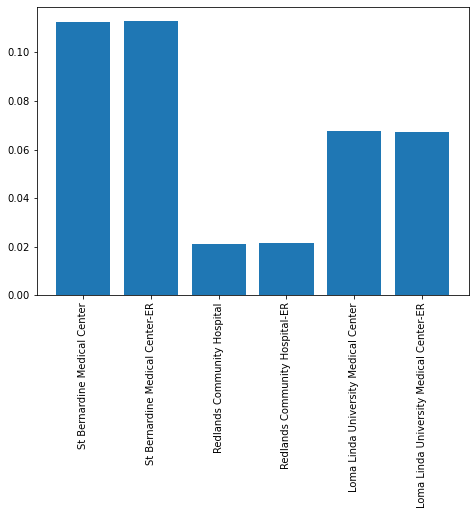

In [40]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
addrs = neighborhood_data_dict["hospitals"]
scores = neighborhood_data_dict["distance"]
ax.bar(addrs,scores)
plt.xticks(rotation=90)
plt.show()

In [41]:
from arcgis.geocoding import get_geocoders
geocoder = get_geocoders(gis)[0]

In [42]:

time_square = geocode("Time Square, NYC")[0]

map8 = gis.map(time_square)
map8

MapView(layout=Layout(height='400px', width='100%'))

In [43]:
restaurants = geocode(None, time_square['extent'], category="Food", max_locations=100)
for restaurant in restaurants:
    popup = { 
                "title" : restaurant['address'], 
                "content" : "Phone: " + restaurant['attributes']['Phone']
            }
    map8.draw(restaurant['location'], popup)

In [44]:
map9 = gis.map(time_square)
map9

MapView(layout=Layout(height='400px', width='100%'))

In [45]:
categories = "Indian Food, Chinese Food, Burgers, Thai Food"

In [46]:
chinese_symbol = {
"type": "esriSMS",
 "style": "esriSMSSquare",
 "color": [115,100,76,55],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

burgers_symbol = {
"type": "esriSMS",
 "style": "esriSMSCircle",
 "color": [15,0,176,255],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

In [47]:
restaurants = geocode(None, time_square['extent'], category=categories, max_locations=100)

for restaurant in restaurants:
    popup = { 
                "title" : restaurant['address'], 
                "content" : "Phone: " + restaurant['attributes']['Phone']
            }
    if restaurant['attributes']['Type'] == 'Thai Food':
        map9.draw(restaurant['location'], popup, thai_symbol) # green square
    elif restaurant['attributes']['Type'] == 'Indian Food':
        map9.draw(restaurant['location'], popup, indian_symbol) # dark red circle
    elif restaurant['attributes']['Type'] == 'Chinese Food':
        map9.draw(restaurant['location'], popup, chinese_symbol) # mint square
    else:
        map9.draw(restaurant['location'], popup, burgers_symbol) # blue circle

In [48]:
symbols = {"groceries": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                         "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Shopping.png",
                         "contentType":"image/png","width":12,"height":12},
          "coffee": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                     "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Coffee.png",
                     "contentType":"image/png","width":12,"height":12},
          "restaurant": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                         "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Dining.png",
                         "contentType":"image/png","width":12,"height":12},
          "bar": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                  "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Bar.png",
                  "contentType":"image/png","width":12,"height":12},
          "gas": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                  "url":"http://static.arcgis.com/images/Symbols/Transportation/esriBusinessMarker_72.png",
                  "contentType":"image/png","width":12,"height":12},
          "park": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                      "url":"http://static.arcgis.com/images/Symbols/OutdoorRecreation/RestArea.png",
                      "contentType":"image/png","width":10,"height":10},
          "school": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                     "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Note.png",
                     "contentType":"image/png","width":10,"height":10},
          "library": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                      "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/LiveShow.png",
                      "contentType":"image/png","width":12,"height":12}}

In [49]:
list(symbols.keys()) 

['groceries',
 'coffee',
 'restaurant',
 'bar',
 'gas',
 'park',
 'school',
 'library']

In [50]:
def search_and_map(in_map, kind="groceries"):
    per_kind = geocode(kind, search_extent=search_area_extent, 
                       max_locations=20, as_featureset=True)
    neighborhood_data_dict[kind] = []

    for place in per_kind:
        popup={"title" : place.attributes['PlaceName'], 
               "content" : place.attributes['Place_addr']}
        in_map.draw(place.geometry, symbol=symbols[kind], popup=popup)
        neighborhood_data_dict[kind].append(place.attributes['PlaceName'])

In [51]:

map7.zoom = 13
map7

MapView(layout=Layout(height='400px', width='100%'))

In [52]:

for kind in list(symbols.keys()) :
    search_and_map(map7, kind)

In [53]:
neighborhood_df = pd.DataFrame.from_dict(neighborhood_data_dict, orient='index')
neighborhood_df = neighborhood_df.transpose()
neighborhood_df

,hospitals,distance,groceries,coffee,restaurant,bar,gas,park,school,library
0,St Bernardine Medical Center,0.112609,ALDI,Starbucks,Denny's,Bassrush Massive,ARCO,Palm Park,Public Safety Academy,Howard Rowe Public Library
1,St Bernardine Medical Center-ER,0.113013,El Super,Starbucks,Carolyn's Cafe,The Office Saloon,Valero Energy,Meadowbrook Fields,Victoria Elementary School,Country Law Library
2,Redlands Community Hospital,0.021213,Mother's Nutritional Centers,Starbucks,Juice It Up!,Dingers Sports Bar and Grill,Chevron,Meadowbrook Park,La Petite Academy,San Bernardino County Library
3,Redlands Community Hospital-ER,0.021671,Stater Bros. Markets,Starbucks,Starbucks,Arrowhead Country Club,Chevron Extra Mile,Seccombe Lake,Hope Christian Elementary School,Coddington Library
4,Loma Linda University Medical Center,0.06784,E D M Supermarket,Starbucks,Escape Craft Brewery,Sportspage,Circle K,Perris Hill Park,Franklin Elementary School,Norman Feldheym Central Library
5,Loma Linda University Medical Center-ER,0.067209,Food 4 Less,Starbucks,SJL tacos,Trenia's Bed,Chevron Extra Mile,Mill Park,Tender Care for Kids,San Bernardino Public Library
6,None,None,S M Seafood & Asian Market,Starbucks,Patio Pantry,Gold Ball Billiards,ARCO,Redlands Sports Park,Target Community Schools,AK Smiley Public Library
7,None,None,Shop Rite No 3 Market,Starbucks,Los Takos,Pool Club,76,Sylvan Park,Ahrens Child Care Center,Highland Branch Library
8,None,None,Mother's Nutritional Centers,Starbucks,Red Wasabi,South Side Saloon,Shell Oil,Crafton Park,Target Community School,Loma Linda Branch Library
9,None,None,Ninety Nine Njr Outlet,Boba Tea House,Jan In Jan O,The Blue Swing,Chevron,Community Park,Redlands Christian School,Del E Webb Memorial Library


Text(0.5, 1.0, 'Facilities within 10 miles of Esri')

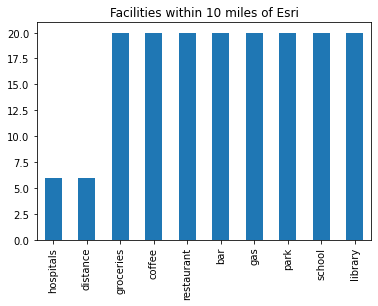

In [54]:
neighborhood_df.count().plot(kind='bar')
plt.title('Facilities within 10 miles of Esri')

In [55]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import lengths

In [56]:
map1 = gis.map()
map1.basemap = "satellite"

In [57]:

map1

MapView(layout=Layout(height='400px', width='100%'))

In [58]:
map1.height = '650px'

In [59]:
location = geocode("Central Park, New York")[0]
map1.extent = location['extent']


In [60]:
map1.zoom = 14

In [61]:
# Define the callback function that computes the length.
def calc_dist(map1, g):
    print("Computing length of drawn polyline...")
    length = lengths(g['spatialReference'], [g], "", "geodesic")
    print("Length: " + str(length[0]) + " m.")

# Set calc_dist as the callback function to be invoked when a polyline is drawn on the map
map1.on_draw_end(calc_dist)

In [62]:
map1.draw("polyline")


In [63]:
map1.clear_graphics()
map1

MapView(layout=Layout(height='400px', width='100%'))